In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('data/act_train.csv', parse_dates=['date'])
test = pd.read_csv('data/act_test.csv', parse_dates=['date'])
ppl = pd.read_csv('data/people.csv', parse_dates=['date'])

df_train = pd.merge(train, ppl, on='people_id')
df_test = pd.merge(test, ppl, on='people_id')
del train, test, ppl

In [4]:
print(df_train.head())

  people_id   activity_id     date_x activity_category char_1_x char_2_x  \
0   ppl_100  act2_1734928 2023-08-26            type 4      NaN      NaN   
1   ppl_100  act2_2434093 2022-09-27            type 2      NaN      NaN   
2   ppl_100  act2_3404049 2022-09-27            type 2      NaN      NaN   
3   ppl_100  act2_3651215 2023-08-04            type 2      NaN      NaN   
4   ppl_100  act2_4109017 2023-08-26            type 2      NaN      NaN   

  char_3_x char_4_x char_5_x char_6_x   ...   char_29 char_30 char_31 char_32  \
0      NaN      NaN      NaN      NaN   ...     False    True    True   False   
1      NaN      NaN      NaN      NaN   ...     False    True    True   False   
2      NaN      NaN      NaN      NaN   ...     False    True    True   False   
3      NaN      NaN      NaN      NaN   ...     False    True    True   False   
4      NaN      NaN      NaN      NaN   ...     False    True    True   False   

   char_33 char_34 char_35 char_36 char_37 char_38  
0  

In [5]:
df_train.columns

Index(['people_id', 'activity_id', 'date_x', 'activity_category', 'char_1_x',
       'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x',
       'char_8_x', 'char_9_x', 'char_10_x', 'outcome', 'char_1_y', 'group_1',
       'char_2_y', 'date_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y',
       'char_7_y', 'char_8_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12',
       'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18',
       'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24',
       'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30',
       'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36',
       'char_37', 'char_38'],
      dtype='object')

let's take a look at the range of the two date variables

In [6]:
for d in ['date_x', 'date_y']:
    print('Start of ' + d + ': ' + str(df_train[d].min().date()))
    print('  End of ' + d + ': ' + str(df_train[d].max().date()))
    print('Range of ' + d + ': ' + str(df_train[d].max() - df_train[d].min()) + '\n')

Start of date_x: 2022-07-17
  End of date_x: 2023-08-31
Range of date_x: 410 days 00:00:00

Start of date_y: 2020-05-18
  End of date_y: 2023-08-31
Range of date_y: 1200 days 00:00:00



So we can see that all the dates are a few years in the future, all the way until 2023! Although we now though that this is because the data was anonymised, so we can essentially treat these as if they were the last few years instead.
We can also see that date_x is on the order of 1 year, while date_y is 3 times longer, even though they both end on the same day (the date before they stopped collecting the dataset perhaps?)

# Feature structure
Here I'm grouping the activities by date, and then for each date working out the number of activities that happened on that day as well as the probability of class 1 on that day.

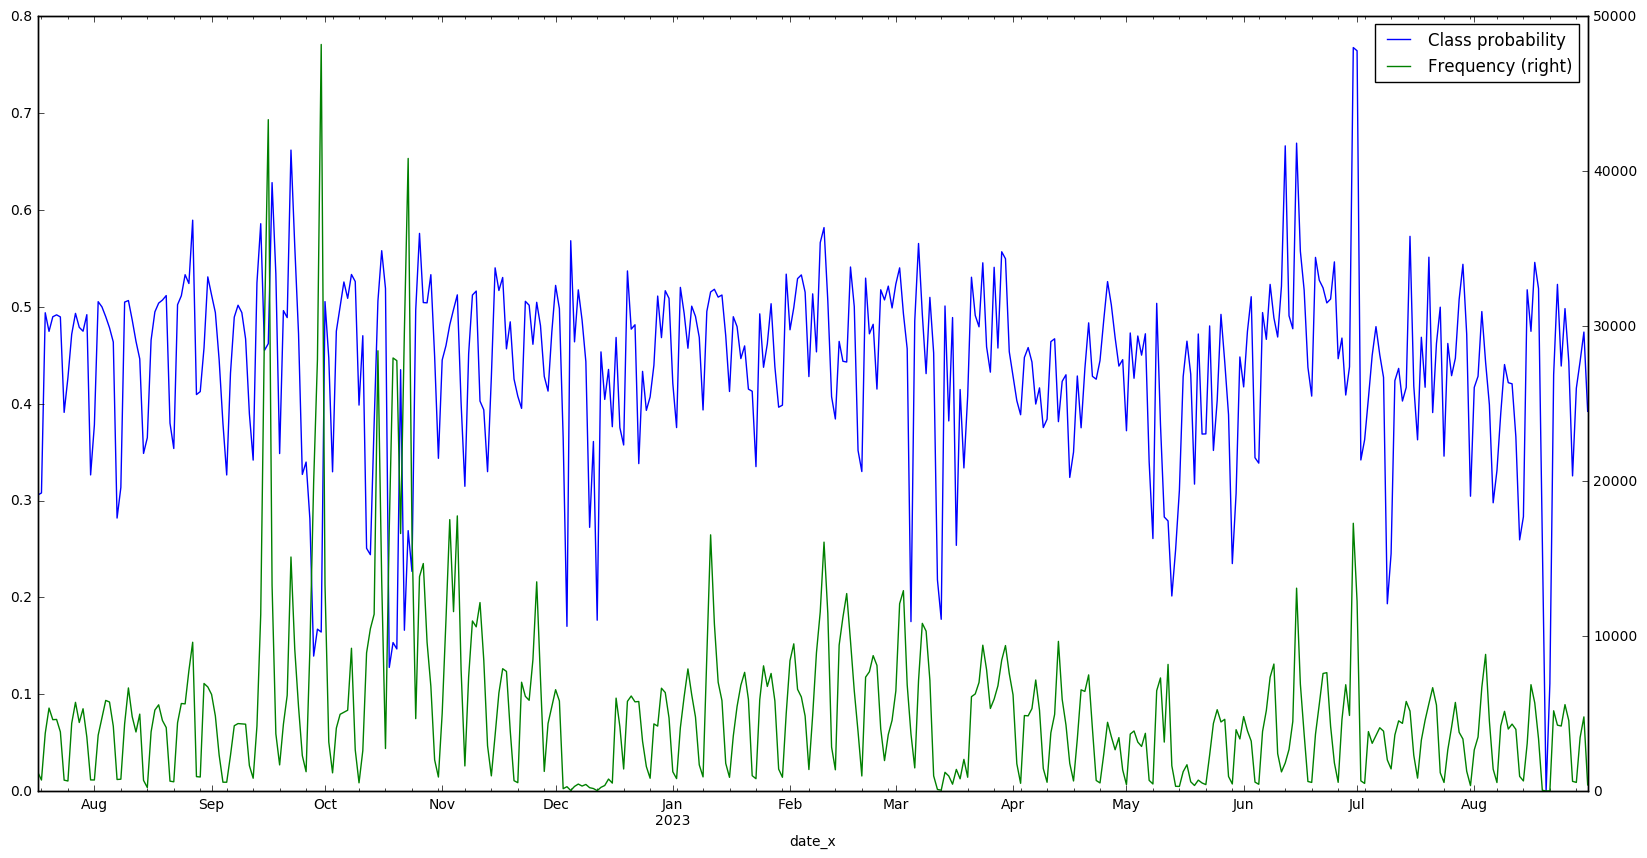

In [7]:
date_x = pd.DataFrame()
date_x['Class probability'] = df_train.groupby('date_x')['outcome'].mean()
date_x['Frequency'] = df_train.groupby('date_x')['outcome'].size()
date_x.plot(secondary_y='Frequency', figsize=(20, 10))

This plot shows some very interesting findings. There appears to be a very apparent weekly pattern, where on weekends there are much less events, as well as the probability of a event being a '1' class being much lower.
We can see that during the week the classes are pretty balanced at ~0.5 while on weekends they drop to 0.4-0.3 (this could be very useful information).
We can also see some very big peaks in number of activities around the September-October time frame, which we will look into later in the EDA. But first, let's do the same with the other date feature, date_y!

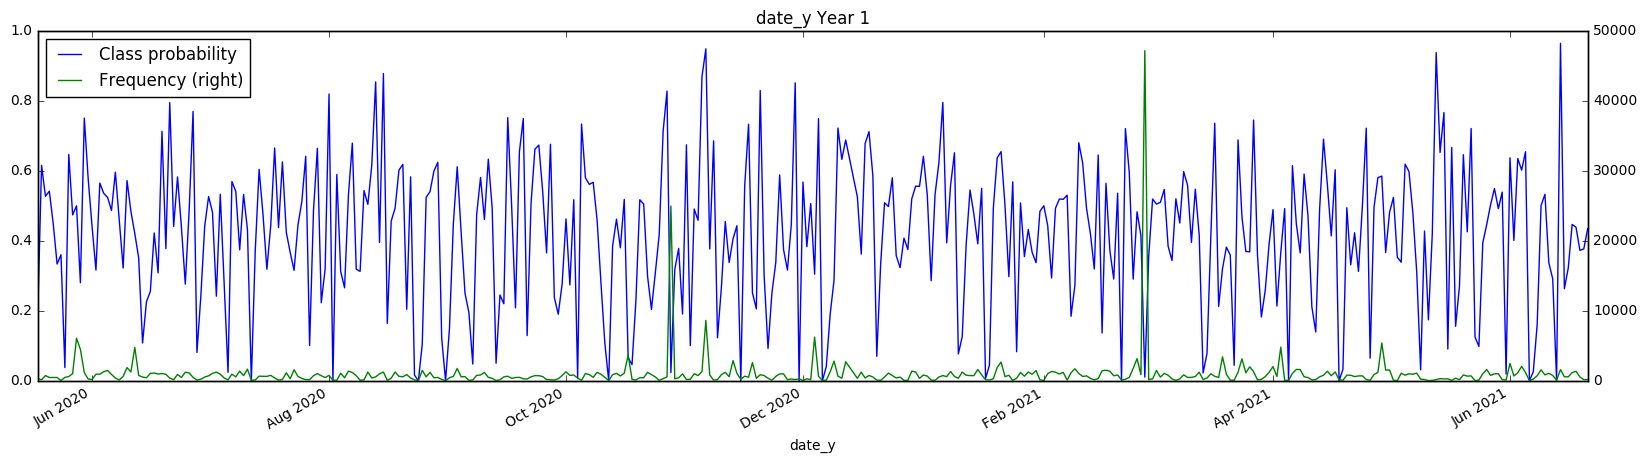

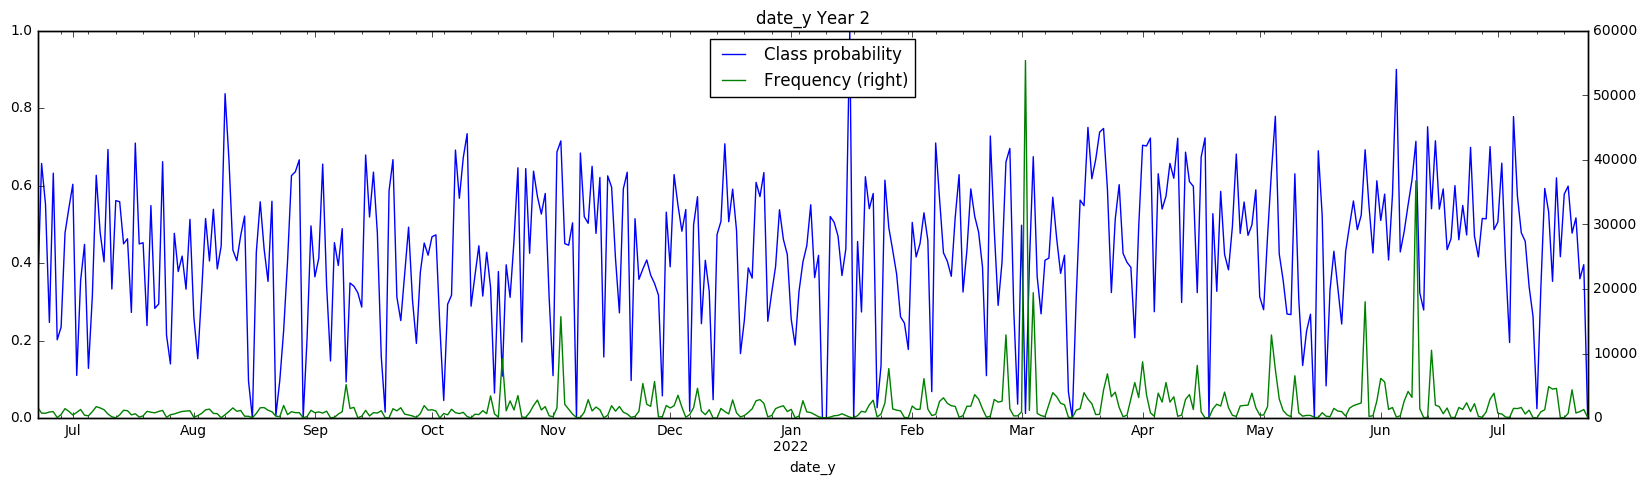

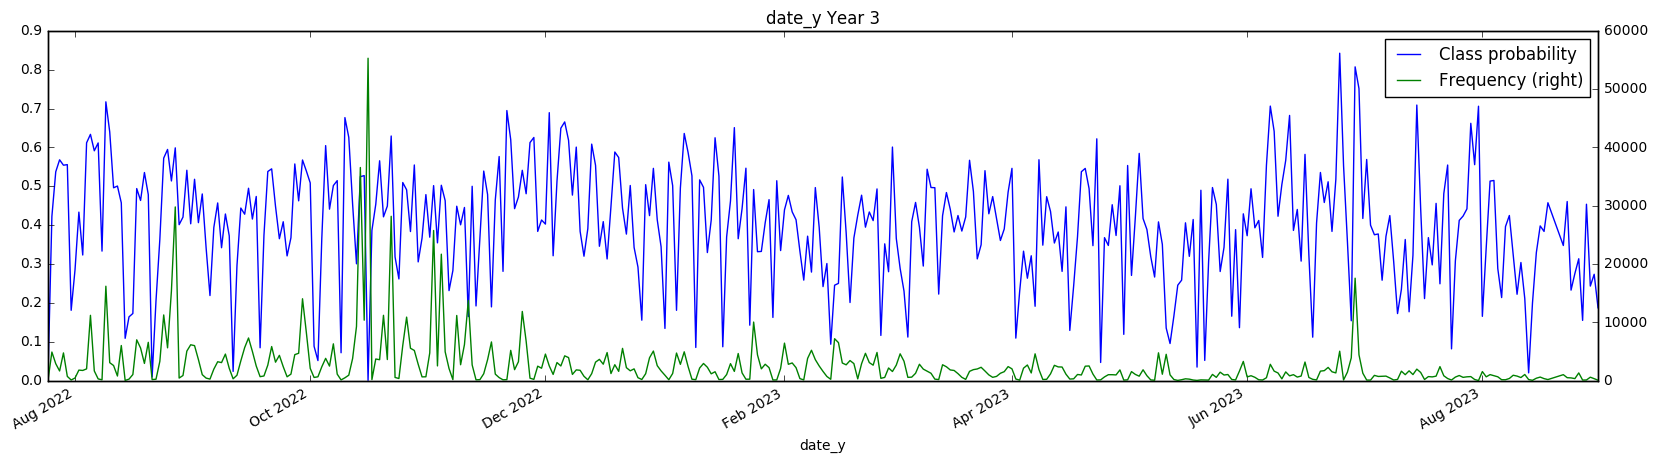

In [8]:
date_y = pd.DataFrame()
date_y['Class probability'] = df_train.groupby('date_y')['outcome'].mean()
date_y['Frequency'] = df_train.groupby('date_y')['outcome'].size()
# We need to split it into multiple graphs since the time-scale is too long to show well on one graph
i = int(len(date_y) / 3)
date_y[:i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 1')
date_y[i:2*i].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 2')
date_y[2*i:].plot(secondary_y='Frequency', figsize=(20, 5), title='date_y Year 3')

There also appears to be a weekly structure to the date_y variable, although it isn't as cleanly visible. However, the class probabilities appear to swing much lower (reaching 0.2 on a weekly basis)
We have to take these class probabilities with a grain of salt however, since we are hitting very low numbers of samples in each day with the date_y (in the hundreds).

# Test set
However, all of this information is useless if the same pattern doesn't emerge in the test set - let's find out if this is the case!
Since we don't know the true class values, we can't check if the same class probability appears in the test set, however we can check that the distribution of samples is the same.

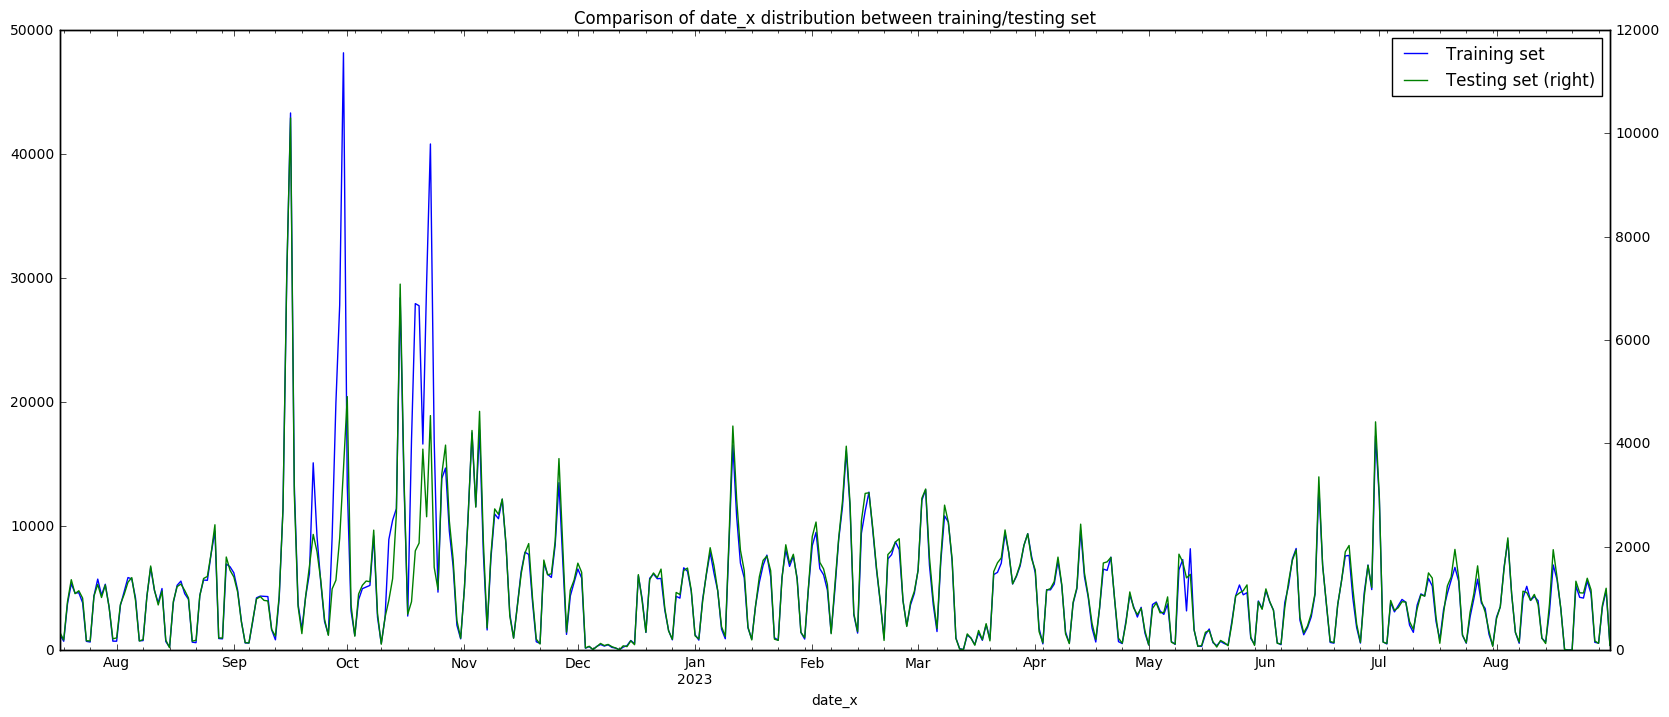

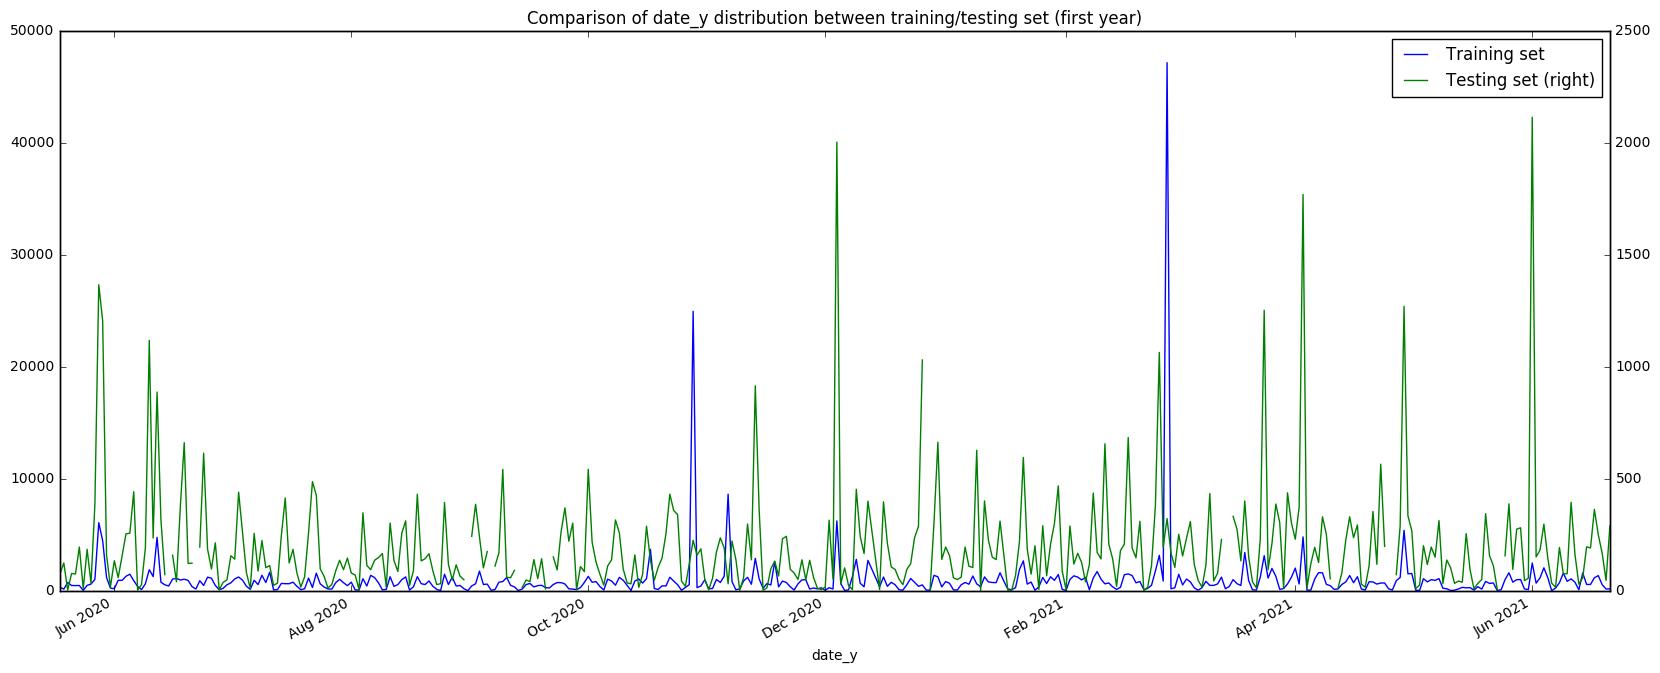

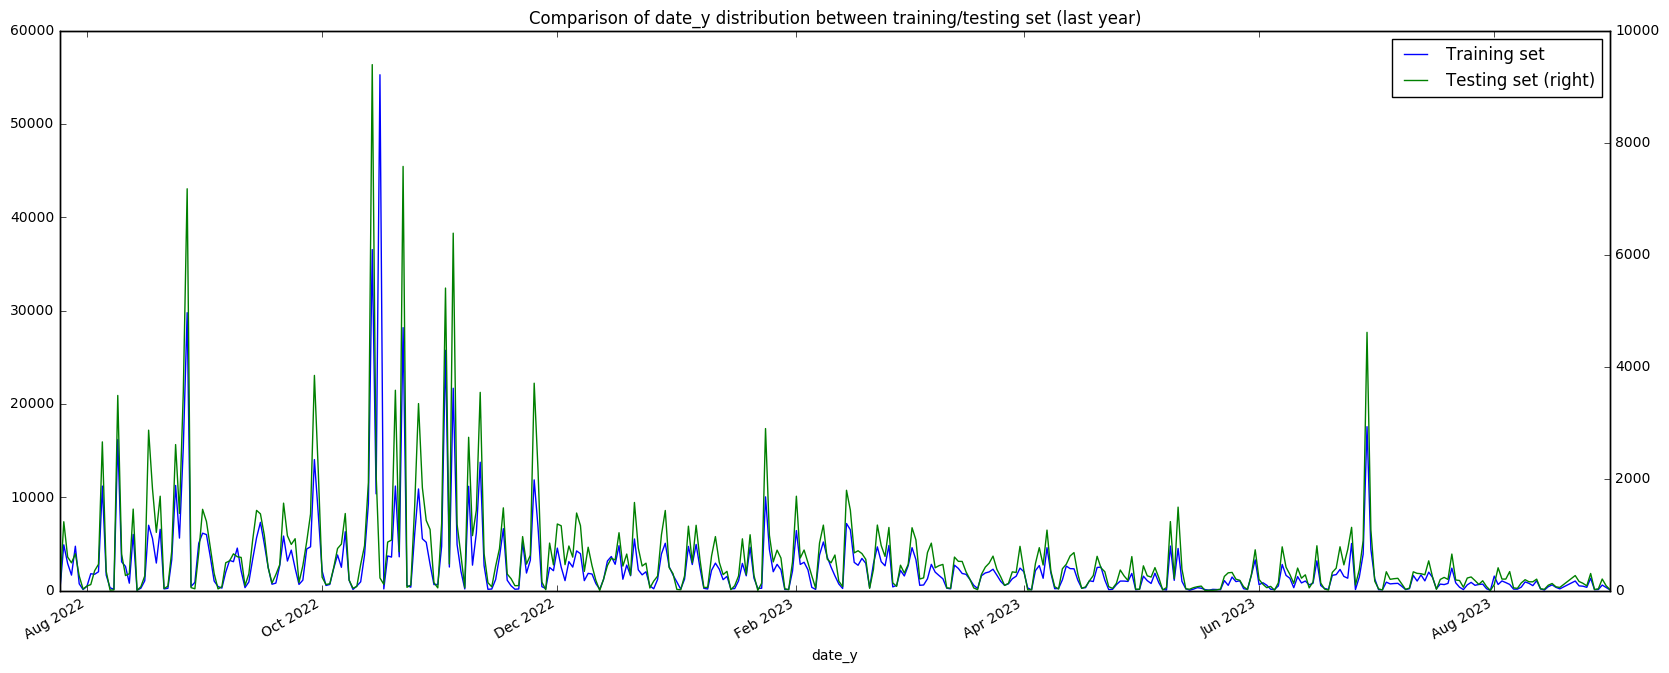

In [9]:
date_x_freq = pd.DataFrame()
date_x_freq['Training set'] = df_train.groupby('date_x')['activity_id'].count()
date_x_freq['Testing set'] = df_test.groupby('date_x')['activity_id'].count()
date_x_freq.plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_x distribution between training/testing set')
date_y_freq = pd.DataFrame()
date_y_freq['Training set'] = df_train.groupby('date_y')['activity_id'].count()
date_y_freq['Testing set'] = df_test.groupby('date_y')['activity_id'].count()
date_y_freq[:i].plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_y distribution between training/testing set (first year)')
date_y_freq[2*i:].plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_y distribution between training/testing set (last year)')

In [10]:
print('Correlation of date_x distribution in training/testing sets: ' + str(np.corrcoef(date_x_freq.T)[0,1]))
print('Correlation of date_y distribution in training/testing sets: ' + str(np.corrcoef(date_y_freq.fillna(0).T)[0,1]))

Correlation of date_x distribution in training/testing sets: 0.853430807691
Correlation of date_y distribution in training/testing sets: 0.709589035055


This gives us some interesting results. For date_x, we observe in the graph (and also in the high correlation value) that the training and testing sets have a very similar structure - this provides strong evidence that the training and testing sets are split based on people, and not based on time or some other unknown factor. Once again, we also observe the peaks (outliers?) in the September/October region.
However, the date_y is less clear cut. There is a low correlation between the two sets, although there is definitely some relationship that we can see visually. There appears to be very many spikes in the test set in the first year (what could this mean?) That being said, in the last year of date_y the relationship between the two sets is much more apparent. Let's try looking at the correlations over the years.

In [11]:
print('date_y correlation in year 1: ' + str(np.corrcoef(date_y_freq[:i].fillna(0).T)[0,1]))
print('date_y correlation in year 2: ' + str(np.corrcoef(date_y_freq[i:2*i].fillna(0).T)[0,1]))
print('date_y correlation in year 3: ' + str(np.corrcoef(date_y_freq[2*i:].fillna(0).T)[0,1]))

date_y correlation in year 1: 0.237056344324
date_y correlation in year 2: 0.682344221229
date_y correlation in year 3: 0.807207224857


Wow, that is definitely a huge improvement over time! Something about the structure of the first year of date_y doesn't match up, so we should keep that in mind (If anyone has any theories I would love to hear them).

In [26]:
from sklearn.metrics import roc_auc_score
features = pd.DataFrame()
# .transform('mean') je nahradenie hodnot vo svojej skupine priemerom skupiny
features['date_x_prob'] = df_train.groupby('date_x')['outcome'].transform('mean')
features['date_y_prob'] = df_train.groupby('date_y')['outcome'].transform('mean')
features['date_x_count'] = df_train.groupby('date_x')['outcome'].transform('count')
features['date_y_count'] = df_train.groupby('date_y')['outcome'].transform('count')
_=[print(f.ljust(12) + ' AUC: ' + str(round(roc_auc_score(df_train['outcome'], features[f]), 6))) for f in features.columns]

date_x_prob  AUC: 0.626182
date_y_prob  AUC: 0.720296
date_x_count AUC: 0.465697
date_y_count AUC: 0.475916


It looks like the date probability features have very high predictive power! I think we might be onto something here.
Anyway, that's all I've got for now. I'll be back with more graphs and text soon, in the meantime if anyone has any theories or questions feel free to ask/discuss in the comments.